In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
final_dataframe = pd.read_csv('final_dataframe.csv')

# Display the first few rows of the DataFrame
final_dataframe.head()

,ClientID,ProductID,TransactionDate,StoreID,StoreCountry,Quantity_in_stock,Category,FamilyLevel1,FamilyLevel2,Universe,ClientSegment,ClientGender,Age,Quantity_sold,SalesNetAmountEuro,product_avg_price_order,avg_price,Weekday,AgeGroup
0,39370740138294,1440540189819119258,2024-12-17 00:00:00+00:00,7704230050291051317,GBR,0.0,Football,Jersey,Nike Away Jersey,Women,LOYAL,F,22.0,2,14.99,7.495,8.450871,Tuesday,20-30
1,39370740138294,1830527890021285361,2024-10-27 00:00:00+00:00,4823099650757441528,GBR,0.0,Football,Shorts,Nike Dri-FIT,Women,LOYAL,F,22.0,1,13.99,13.990,9.519474,Sunday,20-30
2,39370740138294,3095307643986324846,2024-10-28 00:00:00+00:00,4823099650757441528,GBR,0.0,Handball,Ball,Select Ultimate,Men,LOYAL,F,22.0,2,78.99,39.495,52.943846,Monday,20-30
3,118552773044620,7951360260357319889,2024-12-09 00:00:00+00:00,3306498059038628287,USA,1.0,Baseball,Glove,Wilson A2000,Men,LOYAL,F,52.0,2,38.99,19.495,26.589552,Monday,50-60
4,151055224517439,169695220104458160,2025-01-17 00:00:00+00:00,3659728357394804264,USA,1.0,Football,Ball,Adidas Telstar 18,Women,LOYAL,F,37.0,2,25.99,12.995,17.263243,Friday,30-40


In [2]:
# Print concise summary of the DataFrame
final_dataframe.info()

# Print descriptive statistics of the DataFrame
final_dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319003 entries, 0 to 319002
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ClientID                 319003 non-null  int64  
 1   ProductID                319003 non-null  int64  
 2   TransactionDate          319003 non-null  object 
 3   StoreID                  319003 non-null  int64  
 4   StoreCountry             319003 non-null  object 
 5   Quantity_in_stock        319003 non-null  float64
 6   Category                 319003 non-null  object 
 7   FamilyLevel1             319003 non-null  object 
 8   FamilyLevel2             319003 non-null  object 
 9   Universe                 319003 non-null  object 
 10  ClientSegment            319003 non-null  object 
 11  ClientGender             319003 non-null  object 
 12  Age                      319003 non-null  float64
 13  Quantity_sold            319003 non-null  int64  
 14  Sale

,ClientID,ProductID,StoreID,Quantity_in_stock,Age,Quantity_sold,SalesNetAmountEuro,product_avg_price_order,avg_price
count,3.190030e+05,3.190030e+05,3.190030e+05,319003.000000,319003.000000,319003.000000,319003.000000,319003.000000,319003.000000
mean,4.607984e+18,4.621898e+18,4.618991e+18,6.815416,39.007555,1.935913,34.359613,19.334543,18.358258
std,2.667417e+18,2.638437e+18,2.579309e+18,15.006370,12.203155,1.025490,33.940547,19.168780,14.892904
min,3.937074e+13,7.293136e+13,8.512966e+16,-1.000000,15.000000,1.000000,3.010000,0.800000,1.833333
25%,2.278786e+18,2.273762e+18,2.457079e+18,0.000000,29.000000,1.000000,13.980000,7.990000,9.453846
50%,4.592332e+18,4.699494e+18,4.320774e+18,1.000000,38.000000,2.000000,21.990000,12.990000,13.263077
75%,6.918611e+18,6.886150e+18,7.072850e+18,7.000000,48.000000,2.000000,42.990000,21.995000,18.901020
max,9.223163e+18,9.222094e+18,9.099531e+18,253.000000,89.000000,31.000000,421.960000,229.990000,207.990000


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

# Convert TransactionDate to datetime
final_dataframe['TransactionDate'] = pd.to_datetime(final_dataframe['TransactionDate'])

# Group by ClientID and TransactionDate and aggregate the ProductID
grouped = final_dataframe.groupby(['ClientID', 'TransactionDate'])['ProductID'].apply(list).reset_index()

# Create a new DataFrame with ClientID, TransactionDate, and ProductID list
transaction_product_df = pd.DataFrame(grouped)

# Convert ProductID list to string for vectorization
transaction_product_df['ProductID_str'] = transaction_product_df['ProductID'].apply(lambda x: ' '.join(map(str, x)))

# Define the vectorizer
vectorizer = CountVectorizer()

# Vectorize the ProductID list
X = vectorizer.fit_transform(transaction_product_df['ProductID_str'])

# Define and apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
transaction_product_df['Cluster'] = kmeans.fit_predict(X)

# Display the clustered transactions
print(transaction_product_df[['ClientID', 'TransactionDate', 'ProductID', 'Cluster']])


                   ClientID           TransactionDate              ProductID  \
0            39370740138294 2024-10-27 00:00:00+00:00  [1830527890021285361]   
1            39370740138294 2024-10-28 00:00:00+00:00  [3095307643986324846]   
2            39370740138294 2024-12-17 00:00:00+00:00  [1440540189819119258]   
3           118552773044620 2024-12-09 00:00:00+00:00  [7951360260357319889]   
4           151055224517439 2025-01-17 00:00:00+00:00   [169695220104458160]   
...                     ...                       ...                    ...   
283115  9223139948228373940 2024-09-18 00:00:00+00:00  [2713582624985259589]   
283116  9223163437197837359 2023-12-11 00:00:00+00:00  [2808526412659237093]   
283117  9223163437197837359 2024-09-26 00:00:00+00:00  [2808526412659237093]   
283118  9223163437197837359 2024-11-09 00:00:00+00:00  [2808526412659237093]   
283119  9223163437197837359 2024-11-10 00:00:00+00:00  [4228376913636946446]   

        Cluster  
0             0  
1  

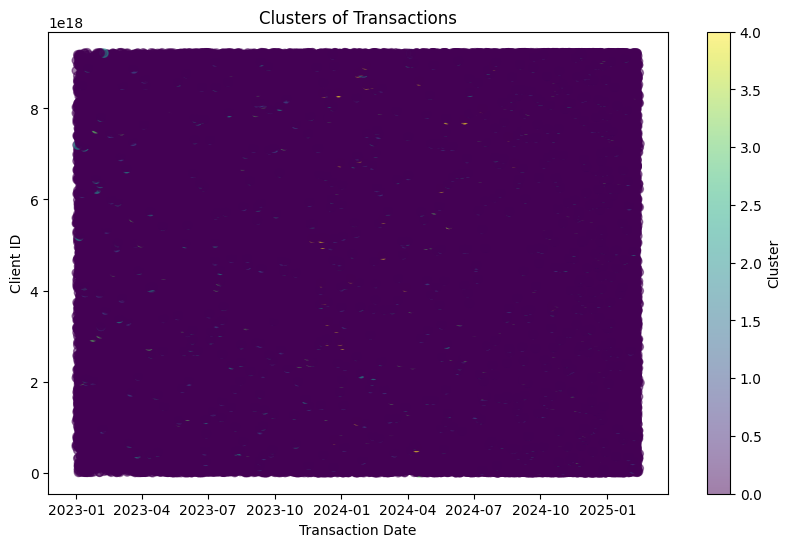

In [5]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(transaction_product_df['TransactionDate'], transaction_product_df['ClientID'], c=transaction_product_df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters of Transactions')
plt.xlabel('Transaction Date')
plt.ylabel('Client ID')
plt.colorbar(label='Cluster')
plt.show()